In [7]:
# I have adopted the basic approach and bits of code from the following blogpost:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


In [304]:
def base_model(optimizer):
    """Builds a basic model for benchmark."""
    
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(3, 150, 150)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(32, init='he_normal'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='he_normal'))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [305]:
def data_augmentation():
    """This function handles data augmentation and reading data from the directories."""
    
    # augmentation configuration used for training
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=20,
            width_shift_range=0.01,
            height_shift_range=0.1,
            shear_range=0.05,
            zoom_range=0.1,
            horizontal_flip=False,
            fill_mode='nearest')

    # augmentation configuration used for testing
    test_datagen = ImageDataGenerator(rescale=1./255)

    # reading images from the specified directory and generating batches of augmented data
    train_generator = train_datagen.flow_from_directory(
            'data/train',
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary')
    
    # reading images from the specified directory and generating batches of augmented data
    validation_generator = test_datagen.flow_from_directory(
            'data/validation',
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary')
    
    return train_generator, validation_generator

In [306]:
def learning_curves(optimizer, history):
    """Display and save learning curves."""
    
    # accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('accuracy of the model')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='lower right')
    plt.savefig(str(optimizer)+'_accuracy.png')
    plt.show()

    # loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss of the model')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.savefig(str(optimizer)+'_loss.png')
    plt.show()

In [310]:
def run_model(optimizer, nb_epoch):
    """This function builds the model"""
    
    train_generator, validation_generator  = data_augmentation()
    model = build_model(optimizer)
    #model = base_model(optimizer)
    
    history = model.fit_generator(
                    train_generator,
                    samples_per_epoch=200,
                    nb_epoch=nb_epoch,
                    validation_data=validation_generator,
                    nb_val_samples=100,
                    verbose=1)
    
    learning_curves(optimizer, history)
    model.save_weights(str(optimizer)+'.h5')
    
    return model

In [3]:
def build_model(optimizer):
    """Builds model with desired hyperparameters."""
    
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(3, 150, 150), name='conv1'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(32, 3, 3, activation='relu', name='conv2'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv3'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
192/200 [===========================>..] - ETA: 2s - loss: 0.7977 - acc: 0.5052 

C:\Users\bfeher\AppData\Local\Continuum\Anaconda2\lib\site-packages\keras\engine\training.py:1403: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


224/200 [=================================] - 70s - loss: 0.7796 - acc: 0.5179 - val_loss: 0.6849 - val_acc: 0.5078
Epoch 2/10
208/200 [===============================] - 63s - loss: 0.6950 - acc: 0.5096 - val_loss: 0.6800 - val_acc: 0.7212
Epoch 3/10
224/200 [=================================] - 66s - loss: 0.6643 - acc: 0.6741 - val_loss: 0.6354 - val_acc: 0.8750
Epoch 4/10
208/200 [===============================] - 63s - loss: 0.6274 - acc: 0.6587 - val_loss: 0.5549 - val_acc: 0.7969
Epoch 5/10
224/200 [=================================] - 67s - loss: 0.5827 - acc: 0.6830 - val_loss: 0.4582 - val_acc: 0.9327
Epoch 6/10
208/200 [===============================] - 63s - loss: 0.4763 - acc: 0.7740 - val_loss: 0.3458 - val_acc: 0.8654
Epoch 7/10
224/200 [=================================] - 67s - loss: 0.4431 - acc: 0.8170 - val_loss: 0.2706 - val_acc: 0.9688
Epoch 8/10
208/200 [===============================] - 62s - loss: 0.3813 - acc: 0.8317 - val_loss: 0.1859 - val_acc: 0.9766
Epo

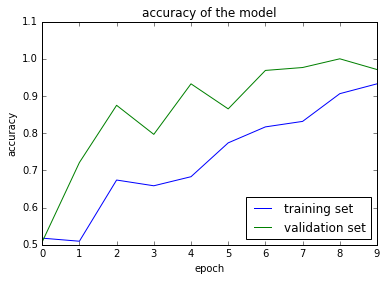

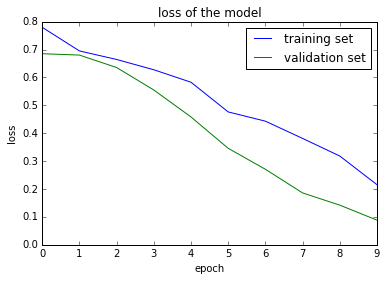

[WARNING] adam.h5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True in save_weights!
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
224/200 [=================================] - 67s - loss: 1.1517 - acc: 0.4598 - val_loss: 0.6899 - val_acc: 0.5078
Epoch 2/10
208/200 [===============================] - 60s - loss: 0.6832 - acc: 0.5769 - val_loss: 0.6839 - val_acc: 0.5288
Epoch 3/10
224/200 [=================================] - 65s - loss: 0.6994 - acc: 0.5938 - val_loss: 0.6875 - val_acc: 0.4904
Epoch 4/10
208/200 [===============================] - 62s - loss: 0.6573 - acc: 0.6202 - val_loss: 0.6087 - val_acc: 0.6719
Epoch 5/10
224/200 [=================================] - 65s - loss: 0.6392 - acc: 0.6339 - val_loss: 0.5823 - val_acc: 0.9712
Epoch 6/10
208/200 [===============================] - 63s - loss: 0.5721 - acc: 0.8125 - val_loss: 0.4658 - val_acc: 0.9038
Epoch 7/10
224/200 [=================================

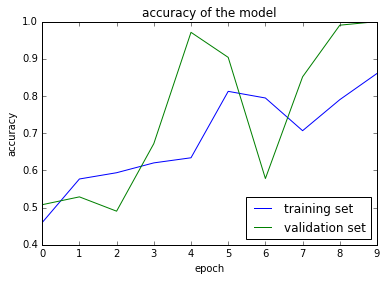

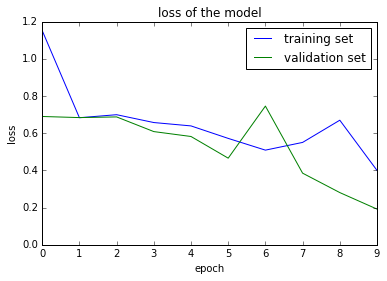

[WARNING] rmsprop.h5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True in save_weights!


In [312]:
optimizer_list = ['adam', 'rmsprop']
for optimizer in optimizer_list:
    model = run_model(optimizer, 10)

# Test model

In [5]:
# Test final model on test set
import h5py
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Load model
model = build_model('rmsprop')
model.load_weights('rmsprop.h5')

# Load test data and labels
test_datagen = ImageDataGenerator(rescale=1./255)
i = 0
for test_data in test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=200,
        class_mode='binary',
        shuffle=False):
    i += 1
    if i > 0:
        break  # otherwise the generator would loop indefinitely
X = test_data[0]
y_true = test_data[1]

# Predict on test data
y_pred = model.predict(X, batch_size=1, verbose=0)

# Round predictions to 1s and 0s
y_pred = np.around(y_pred)

print "The F1 score for the final model is: {}".format(f1_score(y_true, y_pred))
print "The Recall score for the final model is: {}".format(recall_score(y_true, y_pred, pos_label=1))

Found 200 images belonging to 2 classes.
The F1 score for the final model is: 0.980392156863
The F1 score for the final model is: 1.0


# PCA

In [109]:
import numpy as np
import logging
from os import listdir
from os.path import isfile, join
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

In [55]:
# Generate augmented images for inspection with PCA
# Do not forget to copy images to preview/stop and preview/non-stop before continuing with rest of PCA code below

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.01,
        height_shift_range=0.1,
        shear_range=0.05,
        zoom_range=0.1,
        horizontal_flip=False,
        fill_mode='nearest')

# the .flow_from_directory() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory

i = 0
for batch in datagen.flow_from_directory('data/train', 
                                         target_size=(150, 150), 
                                         batch_size=10, 
                                         class_mode=None, 
                                         shuffle=False,
                                         save_to_dir='preview', # Images will be saved to preview, but copy them to subfolders 
                                         save_prefix='stop',    # preview/stop and preview/non-stop as later the code looks for 
                                         save_format='jpeg'):   # images there
    i += 1
    if i > 39:
        break  # otherwise the generator would loop indefinitely

Found 400 images belonging to 2 classes.


In [192]:
def faces_decomposition(data, color):
    '''from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html,
    only wrapped into a function.'''
    
    # Load data
    faces = data
    # Display progress logs on stdout
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s %(message)s')
    n_row, n_col = 2, 3
    n_components = n_row * n_col
    image_shape = (150, 150)
    rng = RandomState(0)

    ###############################################################################

    n_samples, n_features = faces.shape

    # global centering
    faces_centered = faces - faces.mean(axis=0)

    # local centering
    faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

    print("Dataset consists of %d faces" % n_samples)


    ###############################################################################
    # List of the different estimators, whether to center and transpose the
    # problem, and whether the transformer uses the clustering API.
    estimators = [
        ('Eigenimages - RandomizedPCA',
         decomposition.RandomizedPCA(n_components=n_components, whiten=True),
         True)
    ]


    ###############################################################################
    # Plot a sample of the input data

    plot_gallery("First centered images", faces_centered[:n_components], color)

    ###############################################################################
    # Do the estimation and plot it

    for name, estimator, center in estimators:
        print("Extracting the top %d %s..." % (n_components, name))
        t0 = time()
        data = faces
        if center:
            data = faces_centered
        estimator.fit(data)
        train_time = (time() - t0)
        print("done in %0.3fs" % train_time)
        if hasattr(estimator, 'cluster_centers_'):
            components_ = estimator.cluster_centers_
        else:
            components_ = estimator.components_
        if hasattr(estimator, 'noise_variance_'):
            plot_gallery("Pixelwise variance",
                         estimator.noise_variance_.reshape(1, -1), color, n_col=1,
                         n_row=1)
        plot_gallery('%s - Train time %.1fs' % (name, train_time),
                     components_[:n_components], color)

    plt.show()

In [193]:
def plot_gallery(title, images, color, n_col=n_col, n_row=n_row):
    '''from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html,
    added color parameter to draw different channels.'''
    
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    print color
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=color,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [206]:
def load_images_pca(directory, image_names):
    '''Loads color images in specified directory, 
    and transforms them into numpy arrays for PCA,
    returning Red, Blue, Green channels separately.'''
    
    n = 0
    for i in image_names:
        img = load_img(directory+str(i))  # this is a PIL image
        x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
        x = x * (1./255)
        x = x.reshape(3, -1)
        if n == 0:
            r = [x[0]]
            b = [x[1]]
            g = [x[2]]
            n += 1
        else:
            r = np.append(r, [x[0]], axis=0)
            b = np.append(b, [x[1]], axis=0)
            g = np.append(g, [x[2]], axis=0)
    
    return r, b, g

In [211]:
def PCA_for_category(path):
    '''Runs PCA on images for one category stored at path.'''
    
    image_names = [f for f in listdir(path) if isfile(join(path, f))]

    chanels = [r, b, g] = load_images_pca(path, image_names)
    colors = ['Reds', 'Blues', 'Greens']

    for data, color in zip(chanels, colors):
        print color
        faces_decomposition(data, color)

Reds
Dataset consists of 200 faces
Reds
Extracting the top 6 Eigenimages - RandomizedPCA...
done in 0.406s
Reds


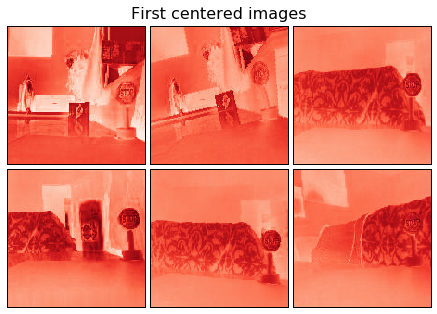

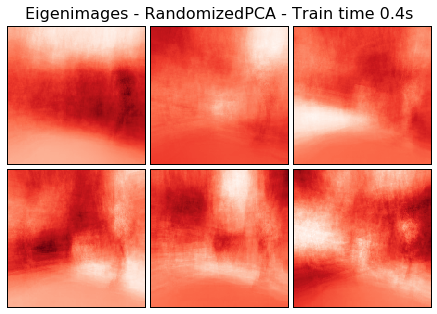

Blues
Dataset consists of 200 faces
Blues
Extracting the top 6 Eigenimages - RandomizedPCA...
done in 0.615s
Blues


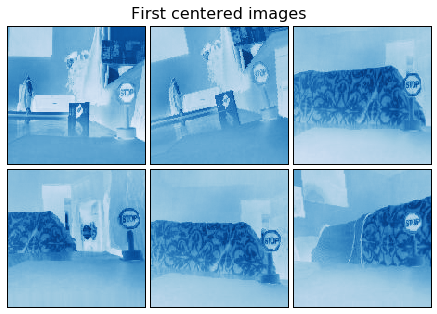

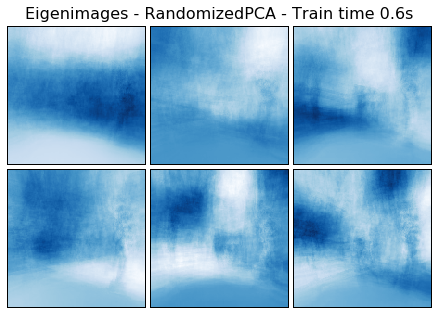

Greens
Dataset consists of 200 faces
Greens
Extracting the top 6 Eigenimages - RandomizedPCA...
done in 0.566s
Greens


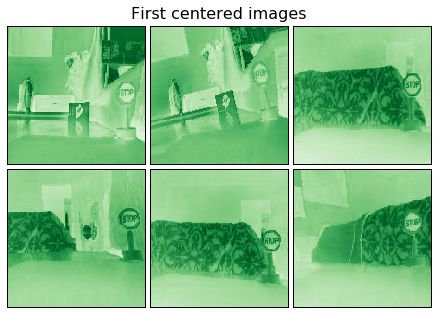

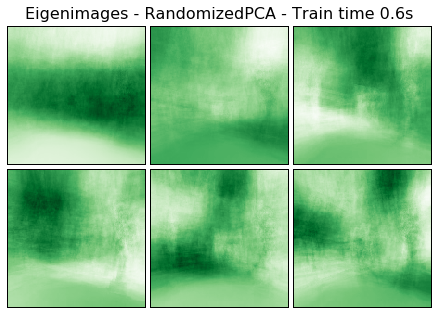

In [212]:
PCA_for_category('preview/stop/')

Reds
Dataset consists of 200 faces
Reds
Extracting the top 6 Eigenimages - RandomizedPCA...
done in 0.407s
Reds


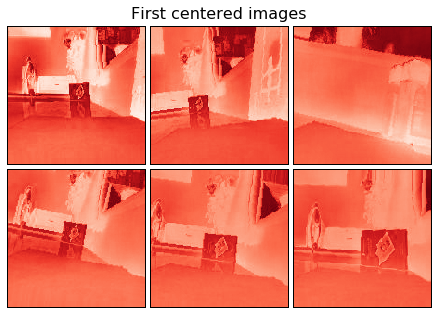

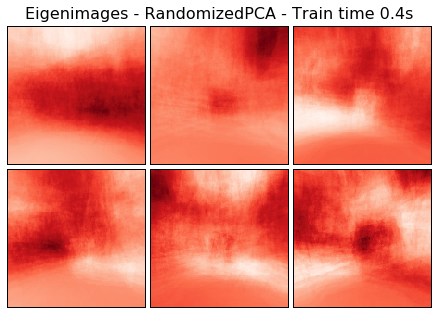

Blues
Dataset consists of 200 faces
Blues
Extracting the top 6 Eigenimages - RandomizedPCA...
done in 0.427s
Blues


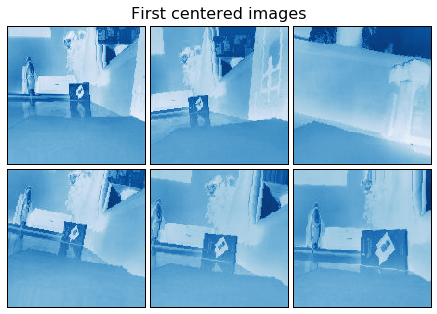

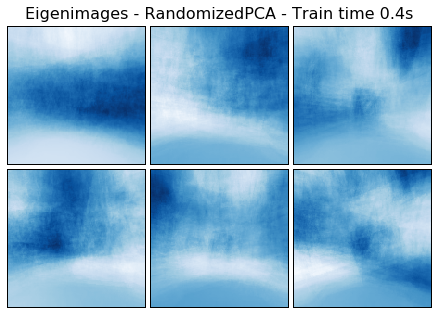

Greens
Dataset consists of 200 faces
Greens
Extracting the top 6 Eigenimages - RandomizedPCA...
done in 0.416s
Greens


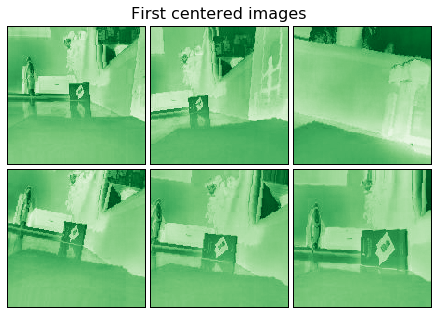

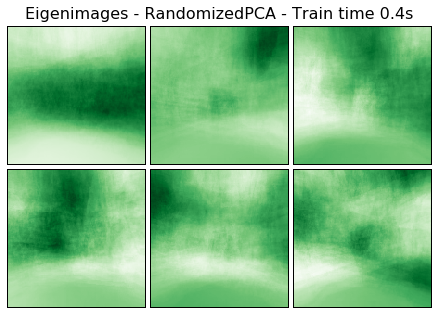

In [213]:
PCA_for_category('preview/nonstop/')

# Filter visualization

In [ ]:
# For visualizing the filters I have adopted and modified the code from the following blogposts:
# https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [223]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', name='conv1', input_shape=(3, 150, 150)))
first_layer = model.layers[-1]
input_img = first_layer.input

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3, activation='relu', name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [57]:
import h5py
model.load_weights('filter_vis.h5')

In [43]:
from keras import backend as K

layer_name = 'conv2'
filter_index = 0

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, filter_index, :, :])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

import numpy as np

# we start from a gray image with some noise
input_img_data = np.random.random((1, 3, img_width, img_height)) * 20 + 128.
# run gradient ascent for 20 steps
step = 1
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)
imsave('%s_filter_%d.png' % (layer_name, filter_index), img)

### Draw output for all filters

In [52]:
layer_list = ['conv1', 'conv2', 'conv3']
filter_list = [31,31,63]
n = 0
for layer_name in layer_list:
    n += 1
    layer_name = layer_name
    for filter_index in range(filter_list[n]):

        filter_index = filter_index

        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        layer_output = layer_dict[layer_name].output
        loss = K.mean(layer_output[:, filter_index, :, :])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])
        
        # we start from a gray image with some noise
        input_img_data = np.random.random((1, 3, img_width, img_height)) * 20 + 128.
        # run gradient ascent for 20 steps
        step = 1
        for i in range(20):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step
        
        img = input_img_data[0]
        img = deprocess_image(img)
        imsave('filters/%s_filter_%d.png' % (layer_name, filter_index), img)